# Neural Networks - PyTorch



## Loading the dataset

In [1]:
import torch
torch.__version__

'1.1.0'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [3]:
breast = datasets.load_breast_cancer()

In [4]:
breast.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
inputs = breast.data
inputs.shape

(569, 30)

In [9]:
outputs = breast.target
outputs.shape

(569,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.25)

In [11]:
X_train.shape

(426, 30)

In [12]:
X_test.shape

(143, 30)

## Data transformation


In [13]:
type(X_train)

numpy.ndarray

In [15]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [16]:
type(X_train)

torch.Tensor

In [22]:
from torch.utils.data import TensorDataset, DataLoader

In [23]:
dataset = TensorDataset(X_train, y_train)

In [24]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [27]:
for i in dataset:
    print (i)

(tensor([1.9270e+01, 2.6470e+01, 1.2790e+02, 1.1620e+03, 9.4010e-02, 1.7190e-01,
        1.6570e-01, 7.5930e-02, 1.8530e-01, 6.2610e-02, 5.5580e-01, 6.0620e-01,
        3.5280e+00, 6.8170e+01, 5.0150e-03, 3.3180e-02, 3.4970e-02, 9.6430e-03,
        1.5430e-02, 3.8960e-03, 2.4150e+01, 3.0900e+01, 1.6140e+02, 1.8130e+03,
        1.5090e-01, 6.5900e-01, 6.0910e-01, 1.7850e-01, 3.6720e-01, 1.1230e-01]), tensor(0.))
(tensor([1.1740e+01, 1.4020e+01, 7.4240e+01, 4.2730e+02, 7.8130e-02, 4.3400e-02,
        2.2450e-02, 2.7630e-02, 2.1010e-01, 6.1130e-02, 5.6190e-01, 1.2680e+00,
        3.7170e+00, 3.7830e+01, 8.0340e-03, 1.4420e-02, 1.5140e-02, 1.8460e-02,
        2.9210e-02, 2.0050e-03, 1.3310e+01, 1.8260e+01, 8.4700e+01, 5.3370e+02,
        1.0360e-01, 8.5000e-02, 6.7350e-02, 8.2900e-02, 3.1010e-01, 6.6880e-02]), tensor(1.))
(tensor([1.3690e+01, 1.6070e+01, 8.7840e+01, 5.7910e+02, 8.3020e-02, 6.3740e-02,
        2.5560e-02, 2.0310e-02, 1.8720e-01, 5.6690e-02, 1.7050e-01, 5.0660e-01,
        1

(tensor([1.8080e+01, 2.1840e+01, 1.1740e+02, 1.0240e+03, 7.3710e-02, 8.6420e-02,
        1.1030e-01, 5.7780e-02, 1.7700e-01, 5.3400e-02, 6.3620e-01, 1.3050e+00,
        4.3120e+00, 7.6360e+01, 5.5300e-03, 5.2960e-02, 6.1100e-02, 1.4440e-02,
        2.1400e-02, 5.0360e-03, 1.9760e+01, 2.4700e+01, 1.2910e+02, 1.2280e+03,
        8.8220e-02, 1.9630e-01, 2.5350e-01, 9.1810e-02, 2.3690e-01, 6.5580e-02]), tensor(0.))
(tensor([2.0470e+01, 2.0670e+01, 1.3470e+02, 1.2990e+03, 9.1560e-02, 1.3130e-01,
        1.5230e-01, 1.0150e-01, 2.1660e-01, 5.4190e-02, 8.3360e-01, 1.7360e+00,
        5.1680e+00, 1.0040e+02, 4.9380e-03, 3.0890e-02, 4.0930e-02, 1.6990e-02,
        2.8160e-02, 2.7190e-03, 2.3230e+01, 2.7150e+01, 1.5200e+02, 1.6450e+03,
        1.0970e-01, 2.5340e-01, 3.0920e-01, 1.6130e-01, 3.2200e-01, 6.3860e-02]), tensor(0.))
(tensor([1.4410e+01, 1.9730e+01, 9.6030e+01, 6.5100e+02, 8.7570e-02, 1.6760e-01,
        1.3620e-01, 6.6020e-02, 1.7140e-01, 7.1920e-02, 8.8110e-01, 1.7700e+00,
        4

(tensor([1.4260e+01, 1.8170e+01, 9.1220e+01, 6.3310e+02, 6.5760e-02, 5.2200e-02,
        2.4750e-02, 1.3740e-02, 1.6350e-01, 5.5860e-02, 2.3000e-01, 6.6900e-01,
        1.6610e+00, 2.0560e+01, 3.1690e-03, 1.3770e-02, 1.0790e-02, 5.2430e-03,
        1.1030e-02, 1.9570e-03, 1.6220e+01, 2.5260e+01, 1.0580e+02, 8.1970e+02,
        9.4450e-02, 2.1670e-01, 1.5650e-01, 7.5300e-02, 2.6360e-01, 7.6760e-02]), tensor(1.))
(tensor([9.3330e+00, 2.1940e+01, 5.9010e+01, 2.6400e+02, 9.2400e-02, 5.6050e-02,
        3.9960e-02, 1.2820e-02, 1.6920e-01, 6.5760e-02, 3.0130e-01, 1.8790e+00,
        2.1210e+00, 1.7860e+01, 1.0940e-02, 1.8340e-02, 3.9960e-02, 1.2820e-02,
        3.7590e-02, 4.6230e-03, 9.8450e+00, 2.5050e+01, 6.2860e+01, 2.9580e+02,
        1.1030e-01, 8.2980e-02, 7.9930e-02, 2.5640e-02, 2.4350e-01, 7.3930e-02]), tensor(1.))
(tensor([1.4590e+01, 2.2680e+01, 9.6390e+01, 6.5710e+02, 8.4730e-02, 1.3300e-01,
        1.0290e-01, 3.7360e-02, 1.4540e-01, 6.1470e-02, 2.2540e-01, 1.1080e+00,
        2

In [33]:
train_loader = DataLoader(dataset, batch_size=10)

In [34]:
for i in train_loader:
    print(i)

[tensor([[1.9270e+01, 2.6470e+01, 1.2790e+02, 1.1620e+03, 9.4010e-02, 1.7190e-01,
         1.6570e-01, 7.5930e-02, 1.8530e-01, 6.2610e-02, 5.5580e-01, 6.0620e-01,
         3.5280e+00, 6.8170e+01, 5.0150e-03, 3.3180e-02, 3.4970e-02, 9.6430e-03,
         1.5430e-02, 3.8960e-03, 2.4150e+01, 3.0900e+01, 1.6140e+02, 1.8130e+03,
         1.5090e-01, 6.5900e-01, 6.0910e-01, 1.7850e-01, 3.6720e-01, 1.1230e-01],
        [1.1740e+01, 1.4020e+01, 7.4240e+01, 4.2730e+02, 7.8130e-02, 4.3400e-02,
         2.2450e-02, 2.7630e-02, 2.1010e-01, 6.1130e-02, 5.6190e-01, 1.2680e+00,
         3.7170e+00, 3.7830e+01, 8.0340e-03, 1.4420e-02, 1.5140e-02, 1.8460e-02,
         2.9210e-02, 2.0050e-03, 1.3310e+01, 1.8260e+01, 8.4700e+01, 5.3370e+02,
         1.0360e-01, 8.5000e-02, 6.7350e-02, 8.2900e-02, 3.1010e-01, 6.6880e-02],
        [1.3690e+01, 1.6070e+01, 8.7840e+01, 5.7910e+02, 8.3020e-02, 6.3740e-02,
         2.5560e-02, 2.0310e-02, 1.8720e-01, 5.6690e-02, 1.7050e-01, 5.0660e-01,
         1.3720e+00, 1.40

## Neural network structure

In [35]:
# 30 -> 16 -> 16 -> 1
network = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())

In [36]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [37]:
loss_function = nn.BCELoss()

In [38]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)

In [39]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [42]:
epochs = 100
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    #print(inputs)
    #print('-----')
    #print(outputs)
    
    optimizer.zero_grad()
   
    predictions = network.forward(inputs) 
    
    loss = loss_function(predictions, outputs)
    
    loss.backward()
    
    optimizer.step()

    running_loss += loss.item()
  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(running_loss / len(train_loader)))

Epoch: 1 loss: 0.6442327540974284
Epoch: 2 loss: 0.6302904930225638
Epoch: 3 loss: 0.6153312547262325
Epoch: 4 loss: 0.598599468552789
Epoch: 5 loss: 0.5794822781584984
Epoch: 6 loss: 0.5611810455488604
Epoch: 7 loss: 0.5351985609808634
Epoch: 8 loss: 0.5102220607358355
Epoch: 9 loss: 0.48572194437647975
Epoch: 10 loss: 0.45687267738719317
Epoch: 11 loss: 0.43614356462345566
Epoch: 12 loss: 0.4074116765066635
Epoch: 13 loss: 0.3881450870702433
Epoch: 14 loss: 0.3678132153527681
Epoch: 15 loss: 0.35107309561829236
Epoch: 16 loss: 0.3339835481588231
Epoch: 17 loss: 0.3251114349032557
Epoch: 18 loss: 0.3032974607722704
Epoch: 19 loss: 0.3084549224653909
Epoch: 20 loss: 0.2993089400751646
Epoch: 21 loss: 0.2823540259932363
Epoch: 22 loss: 0.2822536207562269
Epoch: 23 loss: 0.2776509561510973
Epoch: 24 loss: 0.2762596477256265
Epoch: 25 loss: 0.286770430588445
Epoch: 26 loss: 0.2557348264164703
Epoch: 27 loss: 0.24910803364459858
Epoch: 28 loss: 0.2431073334327964
Epoch: 29 loss: 0.24408758

## Evaluate

In [43]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [45]:
X_test.shape

(143, 30)

In [46]:
type(X_test)

numpy.ndarray

In [47]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

torch.Tensor

In [48]:
predictions = network.forward(X_test)
predictions

tensor([[0.0104],
        [0.2045],
        [0.9465],
        [0.9467],
        [0.9469],
        [0.9469],
        [0.3776],
        [0.9462],
        [0.9468],
        [0.9321],
        [0.0104],
        [0.9147],
        [0.9460],
        [0.9469],
        [0.9468],
        [0.9468],
        [0.3271],
        [0.9469],
        [0.9469],
        [0.9469],
        [0.8930],
        [0.0104],
        [0.0590],
        [0.9301],
        [0.9469],
        [0.9469],
        [0.0104],
        [0.0104],
        [0.0104],
        [0.0104],
        [0.9469],
        [0.9455],
        [0.9469],
        [0.2664],
        [0.9469],
        [0.0109],
        [0.9389],
        [0.9215],
        [0.0888],
        [0.9455],
        [0.9222],
        [0.9469],
        [0.9423],
        [0.7392],
        [0.9468],
        [0.9468],
        [0.9469],
        [0.9469],
        [0.0469],
        [0.9455],
        [0.0104],
        [0.9469],
        [0.9439],
        [0.9469],
        [0.9469],
        [0

In [49]:
predictions = np.array(predictions > 0.5)
predictions

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [50]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [51]:
accuracy_score(y_test, predictions)

0.9230769230769231

In [52]:
cm = confusion_matrix(y_test, predictions)
cm

array([[41,  5],
       [ 6, 91]], dtype=int64)

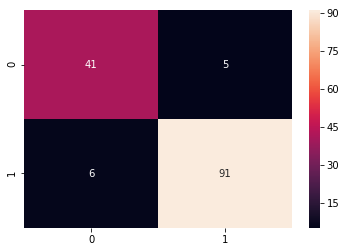

In [53]:
import seaborn as sns
sns.heatmap(cm, annot=True)